In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

In [69]:
# Plot the clusters
def plot_clusters(X, Y, centers, title = ''):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1, 1, 1)
    
    # Get the colors
    colors = plt.cm.Spectral(np.linspace(0, 1, len(centers)))
    
    for cluster_id in np.unique(Y):
        idx = (Y == cluster_id)
        col = colors[cluster_id]
        center = centers[cluster_id]
        ax.plot(X[idx, 0], X[idx, 1], 'p', markerfacecolor = col, marker = '.')
        ax.plot(center[0], center[1], '*', markerfacecolor = 'red', markeredgecolor='w', markersize=20)
    
    ax.set_title(title)
    
    # Remove the axis ticks
    #ax.set_xticks(())
    #ax.set_yticks(())
    
    plt.show()
    plt.close()

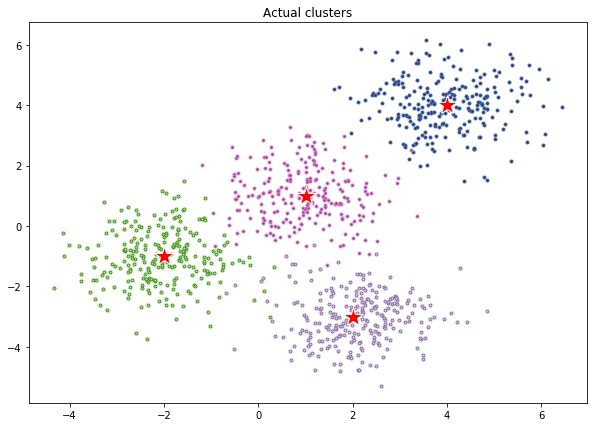

In [70]:
# Set the NumPy random number generator seed
np.random.seed(0)

# Make random clusters of points by using the make_blobs class
true_centers=[[4,4], [-2,-1], [2,-3], [1,1]]
X, Y = make_blobs(n_samples = 1000, centers = true_centers, cluster_std = 0.9)

plot_clusters(X, Y, true_centers, 'Actual clusters')

The four found cluster centers are:
[[ 3.94906949  3.99657382]
 [-2.04493322 -1.04505715]
 [ 2.09878766 -3.02979346]
 [ 0.95484426  1.06465264]]


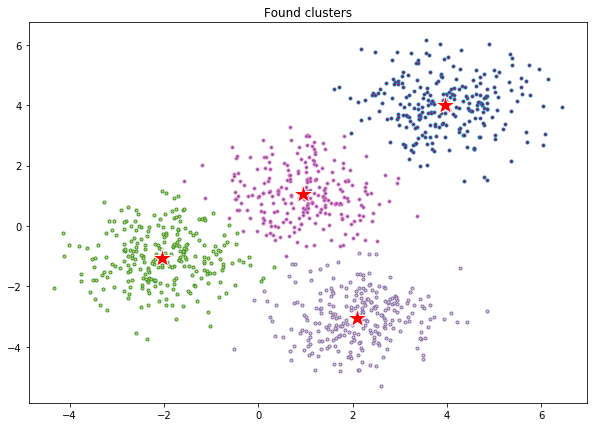

In [71]:
# Instantiate the K-clusters model, with:
#
# init:
#       Initialization method of the centroids will be k-means++ 
#       which selects initial cluster centers for k-mean
#       clustering in a smart way to speed up convergence.
# n_clusters:
#       The number of clusters to form as well as the
#       number of centroids to generate.
#       Value will be: 4 (since we have 4 centers)
# n_init:
#       Number of time the k-means algorithm will be run with 
#       different centroid seeds. The final results will be the
#       best output of n_init consecutive runs in terms of
#       inertia. Value will be: 12

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

k_means.fit(X)

Y_hat = k_means.labels_
found_centers = k_means.cluster_centers_

print('The four found cluster centers are:')
print(found_centers)

# Plot the found clusters
plot_clusters(X, Y_hat, found_centers, 'Found clusters')

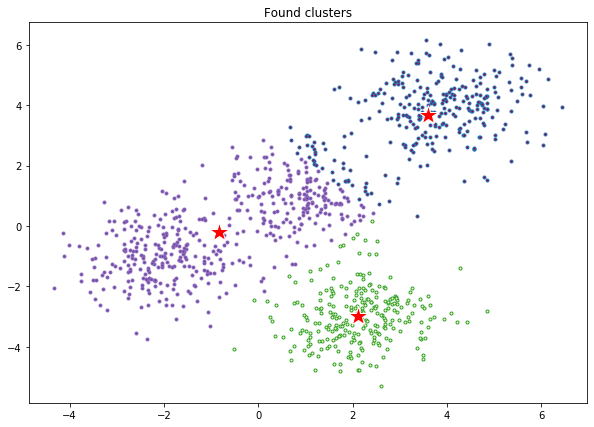

In [74]:
# Try out three clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means_3.fit(X)

Y_hat = k_means_3.labels_
found_centers = k_means_3.cluster_centers_

# Plot the found clusters
plot_clusters(X, Y_hat, found_centers, 'Found clusters')

In [78]:
# Customer Segmentation with K-Means, download and read the data set

!wget -O data/Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

cuts_df = pd.read_csv('data' + os.path.sep + 'Cust_Segmentation.csv')
cuts_df.head()

--2020-02-13 11:22:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: 'data/Cust_Segmentation.csv'

data/Cust_Segmentat 100%[===================>]  33.47K  --.-KB/s    in 0.09s   

2020-02-13 11:22:52 (379 KB/s) - 'data/Cust_Segmentation.csv' saved [34276/34276]



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [79]:
# Drop the irrelevant column: Address
df = cuts_df.drop(labels=['Address'], axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [90]:
#Check for the columns type
print(df.dtypes)

# Check for the N/A values
na_df = df.isna().sum(axis=0)
display(na_df)

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object


Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [114]:
# Get the numpy array exclusing the first index column:
X = np.asanyarray(df.iloc[:,1:])
display(X)

# Substitute the N/A values present in the Defaulted column with 0
X = np.nan_to_num(X)

array([[41. ,  2. ,  6. , ...,  0. ,  6.3,  0. ],
       [47. ,  1. , 26. , ...,  0. , 12.8,  1. ],
       [33. ,  2. , 10. , ...,  1. , 20.9,  2. ],
       ...,
       [25. ,  4. ,  0. , ...,  1. , 33.4,  2. ],
       [32. ,  1. , 12. , ...,  0. ,  2.9,  0. ],
       [52. ,  1. , 16. , ...,  0. ,  8.6,  1. ]])

In [115]:
# Normalization is a statistical method that helps mathematical-
# based algorithms to interpret features with different magnitudes
# and distributions equally.
X_scaled = StandardScaler().fit_transform(X)
display(X_scaled)

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509, -0.70631684],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677,  0.54706377],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385,  1.80044438],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281,  1.80044438],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745, -0.70631684],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 ,  0.54706377]])

In [116]:
# Create and train the KMeans clustering model
NUM_CLUSTERS = 3
km_clust = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)

km_clust.fit(X_scaled)

# Display the data
print('Cluster centers:', km_clust.cluster_centers_)

Cluster centers: [[-3.90439547e-01  1.62695612e-01 -6.79376729e-01 -3.86448408e-01
  -6.83901553e-05 -6.93056978e-02  1.87982575e+00  5.69270845e-01
   1.80044438e+00]
 [-1.50796609e-01 -1.15651304e-01 -1.38795179e-01 -2.73411279e-01
  -3.40626044e-01 -3.71502176e-01 -5.23796543e-01 -3.28592133e-01
  -7.06316837e-01]
 [ 9.91773769e-01  2.38756999e-01  1.27421461e+00  1.43518566e+00
   1.24440502e+00  1.43538377e+00 -2.09335587e-01  5.57517111e-01
   5.47063772e-01]]


In [117]:
# Extend the data frame with the found labels
df['Clus_km'] = km_clust.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [105]:
# Compute the mean feature values per cluster
display(df.iloc[:,1:].drop('Defaulted', axis=1).groupby(by='Clus_km').mean())

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Clus_km,,,,,,,
0,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,7.964991
1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,13.915646
2,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,13.994578


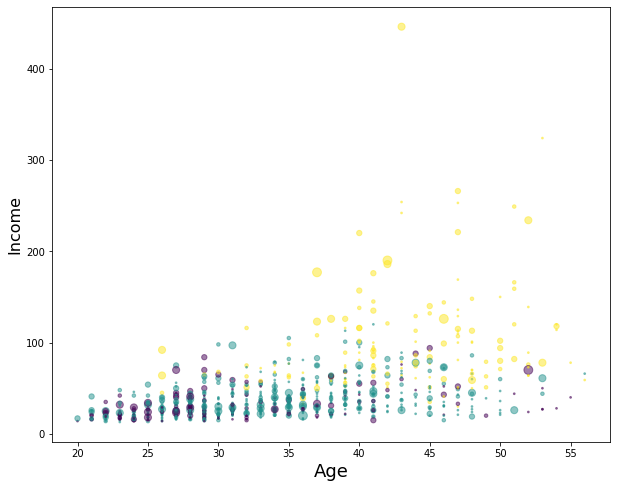

In [126]:
# Lets look at the distribution of customers based on their age and income:
plt.figure(figsize=(10,8))

labels = km_clust.labels_

# The circle size will depict the education 
area = np.pi * ( X[:, 1])**2

# The circle color will depict the cluster
plt.scatter(X[:, 0], X[:, 3], s = area, c = labels.astype(np.float), alpha = 0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()
plt.close()

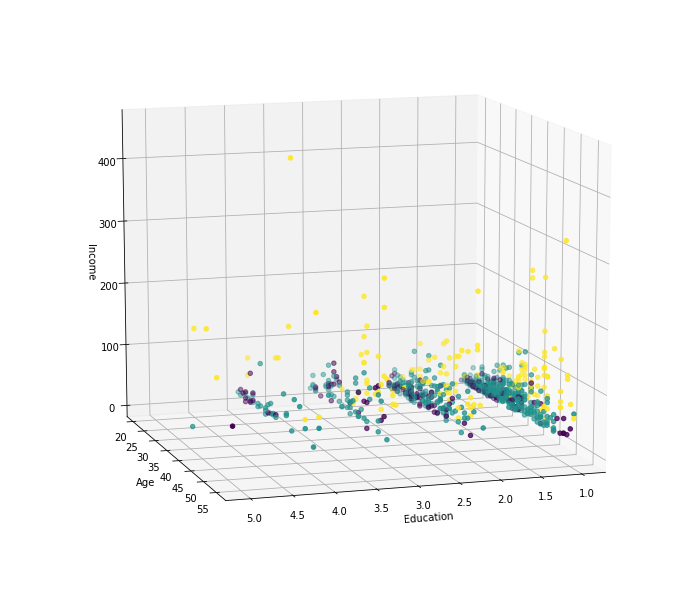

In [135]:
# We could use the 3D plot to make it perhaps a bit more clear
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=12.5, azim=72.5)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c = labels.astype(np.float))

# The 3d version does not really make it more clear ....
# However we can create a profile for each group, considering
# the common characteristics of each cluster, e.g.:
#
# 1. AFFLUENT, EDUCATED AND OLD AGED
# 2. MIDDLE AGED AND MIDDLE INCOME
# 3. YOUNG AND LOW INCOME